In [67]:
import pandas as pd
import numpy as np
import seaborn as sns

# Reading the data

In [68]:
data = pd.read_csv(r'C:\Users\gotim\OneDrive\Desktop\Python Portfolio\data\2022.csv')

In [69]:
data

,Country,Happiness score,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,"7,821","1,892","1,258","0,775","0,736","0,109","0,534"
1,Denmark,"7,636","1,953","1,243","0,777","0,719","0,188","0,532"
2,Iceland,"7,557","1,936","1,320","0,803","0,718","0,270","0,191"
3,Switzerland,"7,512","2,026","1,226","0,822","0,677","0,147","0,461"
4,Netherlands,"7,415","1,945","1,206","0,787","0,651","0,271","0,419"
...,...,...,...,...,...,...,...,...
142,Rwanda*,"3,268","0,785","0,133","0,462","0,621","0,187","0,544"
143,Zimbabwe,"2,995","0,947","0,690","0,270","0,329","0,106","0,105"
144,Lebanon,"2,955","1,392","0,498","0,631","0,103","0,082","0,034"
145,Afghanistan,"2,404","0,758","0,000","0,289","0,000","0,089","0,005"


# Exploratory Data Analysis and Data Wrangling

In [70]:
data.columns

Index(['Country', 'Happiness score', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

## Are there any Null Values?

In [71]:
data.isnull().sum()

Country                                       0
Happiness score                               1
Explained by: GDP per capita                  1
Explained by: Social support                  1
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    1
Explained by: Generosity                      1
Explained by: Perceptions of corruption       1
dtype: int64

In [72]:
data.shape

(147, 8)

## String manipulation 

The data consists of " , " character instead of " . " character representing the values in a float format. which doesn't make sense. Hence replaced the character using a string manipuation function

In [114]:
data['Happiness_score'] = data['Happiness score'].str.replace(',','.')
data['GDP per capita'] = data['Explained by: GDP per capita'].str.replace(',','.')
data['Social support'] = data['Explained by: Social support'].str.replace(',','.')
data['Freedom to make life choices'] = data['Explained by: Freedom to make life choices'].str.replace(',','.')
data['Generosity'] = data['Explained by: Generosity'].str.replace(',','.')
data['Perceptions of corruption'] = data['Explained by: Perceptions of corruption'].str.replace(',','.')

In [125]:
final_df = data.drop(['Happiness score','Explained by: GDP per capita','Explained by: Social support','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption'],axis=1)

## Handling Null Values 

In [126]:
final_df.dropna()

,Country,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness_score
0,Finland,1.892,1.258,0.736,0.109,0.534,7.821
1,Denmark,1.953,1.243,0.719,0.188,0.532,7.636
2,Iceland,1.936,1.320,0.718,0.270,0.191,7.557
3,Switzerland,2.026,1.226,0.677,0.147,0.461,7.512
4,Netherlands,1.945,1.206,0.651,0.271,0.419,7.415
...,...,...,...,...,...,...,...
141,Botswana*,1.503,0.815,0.571,0.012,0.102,3.471
142,Rwanda*,0.785,0.133,0.621,0.187,0.544,3.268
143,Zimbabwe,0.947,0.690,0.329,0.106,0.105,2.995
144,Lebanon,1.392,0.498,0.103,0.082,0.034,2.955


In [161]:
final_df.replace(0.000,final_df.mean(axis=0),inplace=True)

C:\Users\gotim\AppData\Local\Temp/ipykernel_20548/317225460.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  final_df.replace(0.000,final_df.mean(axis=0),inplace=True)


## What are the datatypes?

In [162]:
final_df.dtypes

Country                          object
GDP per capita                  float64
Social support                  float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Happiness_score                 float64
dtype: object

## DataType Conversion

In [163]:
final_df[['Happiness_score', 'GDP per capita', 'Social support', 'Freedom to make life choices','Generosity','Perceptions of corruption']] = final_df[['Happiness_score', 'GDP per capita', 'Social support','Freedom to make life choices','Generosity','Perceptions of corruption']].astype(float)

In [164]:
final_df.dtypes

Country                          object
GDP per capita                  float64
Social support                  float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Happiness_score                 float64
dtype: object

## What's the Range and Average Happiness Score for all the countries?

In [165]:
final_df['Happiness_score'].max()

7.821

In [166]:
final_df['Happiness_score'].min()

2.404

The max and min values of Happiness Score are reasonable since all the scores range between 2 to 8

In [167]:
final_df['Happiness_score'].mean()

5.55357534246575

## Is there any correlation between the features?

In [168]:
correlation = final_df.corr()
correlation

,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness_score
GDP per capita,1.000000,0.748796,0.417605,-0.148967,0.387337,0.781299
Social support,0.748796,1.000000,0.435693,-0.032774,0.214235,0.740657
Freedom to make life choices,0.417605,0.435693,1.000000,0.167747,0.394094,0.579844
Generosity,-0.148967,-0.032774,0.167747,1.000000,0.098843,0.057867
Perceptions of corruption,0.387337,0.214235,0.394094,0.098843,1.000000,0.422786
Happiness_score,0.781299,0.740657,0.579844,0.057867,0.422786,1.000000


In [169]:
abs(correlation['Happiness_score'].sort_values(ascending=False))

Happiness_score                 1.000000
GDP per capita                  0.781299
Social support                  0.740657
Freedom to make life choices    0.579844
Perceptions of corruption       0.422786
Generosity                      0.057867
Name: Happiness_score, dtype: float64

A high correlation exists between GDP per capita, social support for happiness. I would use these three features to build regression models to predict the target Happiness Score of Each Country. GDP per capita cannot solely be used for the analysis, meaning high GDP per capita does not immediately translate to a higher happiness index. Therefore, besides income, there must be other important factors that contribute to people’s happiness besides money.

## Which Country has the highest happiness score and Why?

In [170]:
final_df[final_df.Happiness_score == final_df.Happiness_score.max()]

,Country,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness_score
0,Finland,1.892,1.258,0.736,0.109,0.534,7.821


In [171]:
final_df.describe()

,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness_score
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,1.420106,0.912068,0.520769,0.148386,0.155841,5.553575
std,0.404952,0.269759,0.139345,0.081883,0.126860,1.086843
min,0.570000,0.064000,0.103000,0.007000,0.005000,2.404000
25%,1.101250,0.732000,0.442500,0.089000,0.069500,4.888750
50%,1.445500,0.957500,0.543500,0.134500,0.123500,5.568500
75%,1.784750,1.114250,0.626000,0.197750,0.198500,6.305000
max,2.209000,1.320000,0.740000,0.468000,0.587000,7.821000


According to the Happiness Index, Finland has the highest happiness score, 7.8. It is obvious from the maximum values across the columns that Finland has very high values when it comes to GDP per capita, Social Support, and Freedom to make life choices. It has a relatively low score for generosity. While this does not account for all of Finland's Happiness scores, it might explain why they are ranked highest.

In [176]:
final_df.corr()

,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness_score
GDP per capita,1.000000,0.748796,0.417605,-0.148967,0.387337,0.781299
Social support,0.748796,1.000000,0.435693,-0.032774,0.214235,0.740657
Freedom to make life choices,0.417605,0.435693,1.000000,0.167747,0.394094,0.579844
Generosity,-0.148967,-0.032774,0.167747,1.000000,0.098843,0.057867
Perceptions of corruption,0.387337,0.214235,0.394094,0.098843,1.000000,0.422786
Happiness_score,0.781299,0.740657,0.579844,0.057867,0.422786,1.000000


Text(0.5, 1.0, 'Correlations of Country Data Features')

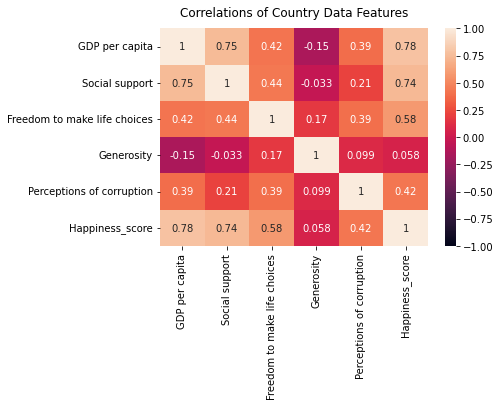

In [178]:
heatmap = sns.heatmap(final_df.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlations of Country Data Features', fontdict={'fontsize':12}, pad=12)

Social support and GDP per capita are highly correlated with happiness scores. Similarly, freedom to make life choices is significantly correlated with happiness scores. These features may contribute more than other factors, but correlation does not imply causation. As a result, we can also determine which features to be dropped when we run a regression analysis on this data.